In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
%time datos = pd.read_csv('data_equilibrada.csv')

Wall time: 16 ms


In [ ]:
datos.shape

(1479, 3)

In [ ]:
%time datos.tokens=datos.tokens.apply(literal_eval)

Wall time: 96.8 ms


In [ ]:
bow = pd.read_csv('bow.csv')

In [ ]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

Wall time: 45.9 ms


In [ ]:
tfidf

,stop,unsubscrib,verifi,inform,request,thank,address,lafargeholcim,benefit,com,...,chart,brotherhood,tanker,driver,vous,webmanag,theworknumb,ppay,tci,usf
0,0.000000,0.000000,0.093465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062238,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.126601,0.000000,0.093610,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.070336,0.071192,0.000000,0.000000,0.000000,0.084040,0.000000,0.099912,0.119191,0.114623,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.084983,0.086018,0.000000,0.000000,0.000000,0.101541,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1476,0.019315,0.019551,0.000000,0.000000,0.000000,0.000000,0.000000,0.082313,0.000000,0.031478,...,0.0,0.0,0.0,0.0,0.447812,0.0,0.0,0.0,0.0,0.0
1477,0.107704,0.109015,0.000000,0.000000,0.000000,0.128688,0.000000,0.000000,0.000000,0.175520,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

# Distancia euclidea:

Pesos uniformes:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   4   0   0   0   0   5]
 [  0 231   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  7   0   0   0 152   0   1]
 [  0   0   0   0   0 147   0]
 [  1   2   0   0   0   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       0.97      1.00      0.99       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       1.00      0.95      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[20  3  8  1  0  1  4]
 [ 1 26 25  2  0  0  0]
 [ 0  0 41  0  0  0  0]
 [ 0  1  2 33  0  0  0]
 [ 1  0  4  0 32  0  2]
 [ 0  0  5  0  0 41  5]
 [ 0  1  3  0  1  1 32]

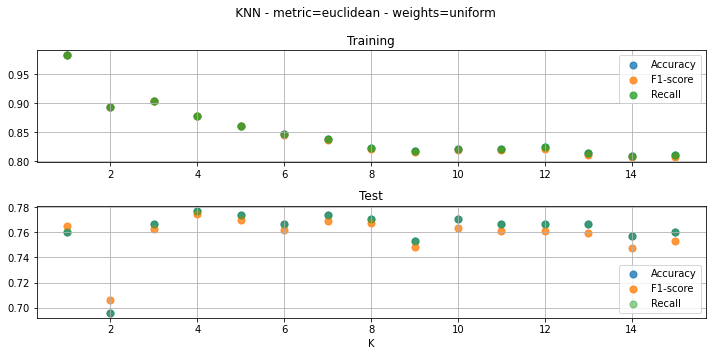

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=euclidean - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   4   0   0   0   0   5]
 [  0 231   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  7   0   0   0 152   0   1]
 [  0   0   0   0   0 147   0]
 [  1   2   0   0   0   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       0.97      1.00      0.99       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       1.00      0.95      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[20  3  8  1  0  1  4]
 [ 1 26 25  2  0  0  0]
 [ 0  0 41  0  0  0  0]
 [ 0  1  2 33  0  0  0]
 [ 1  0  4  0 32  0  2]
 [ 0  0  5  0  0 41  5]
 [ 0  1  3  0  1  1 32]

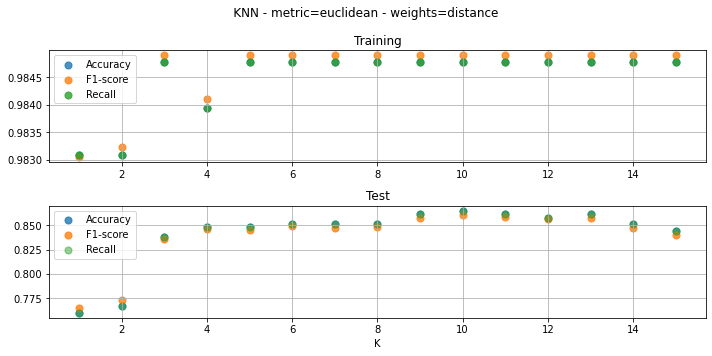

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=euclidean - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia coseno:

Pesos uniformes

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='cosine')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   0   0   0   4   0   5]
 [  2 229   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  4   0   0   0 155   0   1]
 [  0   0   0   0   0 147   0]
 [  2   0   0   0   1   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       1.00      0.99      1.00       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       0.97      0.97      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[21  3  0  2  1  4  6]
 [ 1 44  0  5  4  0  0]
 [ 0  0 41  0  0  0  0]
 [ 0  2  0 34  0  0  0]
 [ 2  0  0  2 33  0  2]
 [ 1  0  0  0  1 42  7]
 [ 2  0  1  0  1  1 33]

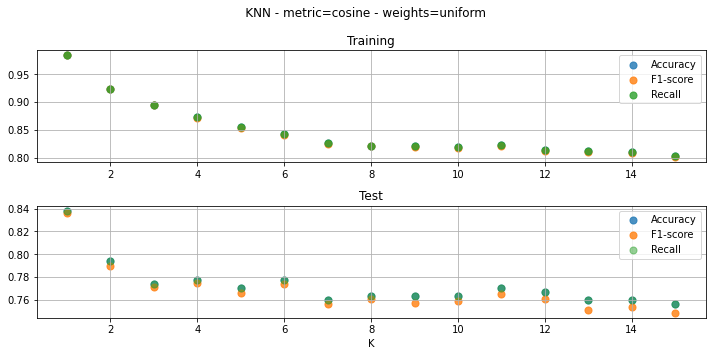

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=cosine - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

In [ ]:
 cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='cosine',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   0   0   0   4   0   5]
 [  2 229   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  4   0   0   0 155   0   1]
 [  0   0   0   0   0 147   0]
 [  2   0   0   0   1   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       1.00      0.99      1.00       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       0.97      0.97      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[21  3  0  2  1  4  6]
 [ 1 44  0  5  4  0  0]
 [ 0  0 41  0  0  0  0]
 [ 0  2  0 34  0  0  0]
 [ 2  0  0  2 33  0  2]
 [ 1  0  0  0  1 42  7]
 [ 2  0  1  0  1  1 33]

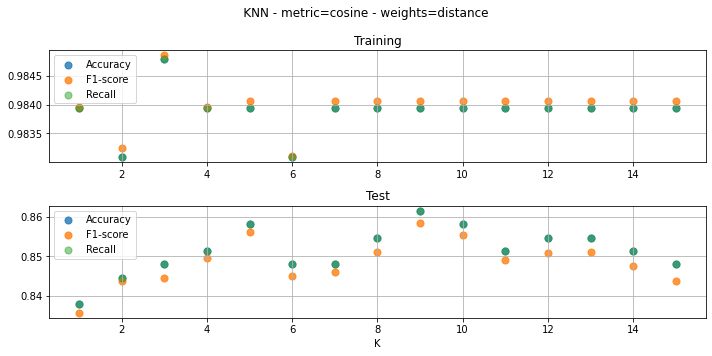

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=cosine - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia manhattan:

Pesos uniformes:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='manhattan')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   4   0   0   0   0   5]
 [  0 231   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  7   0   0   0 152   0   1]
 [  0   0   0   0   0 147   0]
 [  1   2   0   0   0   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       0.97      1.00      0.99       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       1.00      0.95      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[16  2 13  0  0  2  4]
 [ 1 18 33  2  0  0  0]
 [ 0  0 41  0  0  0  0]
 [ 3  2  3 28  0  0  0]
 [ 1  0  5  0 32  0  1]
 [ 0  0  9  0  0 38  4]
 [ 0  1  3  0  1  1 32]

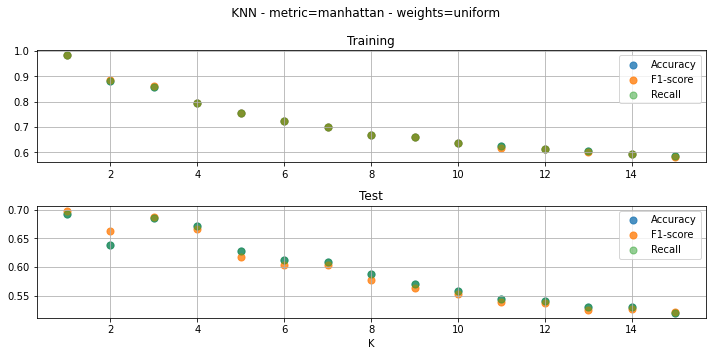

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=manhattan - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='manhattan',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   4   0   0   0   0   5]
 [  0 231   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  7   0   0   0 152   0   1]
 [  0   0   0   0   0 147   0]
 [  1   2   0   0   0   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       0.97      1.00      0.99       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       1.00      0.95      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[16  2 13  0  0  2  4]
 [ 1 18 33  2  0  0  0]
 [ 0  0 41  0  0  0  0]
 [ 3  2  3 28  0  0  0]
 [ 1  0  5  0 32  0  1]
 [ 0  0  9  0  0 38  4]
 [ 0  1  3  0  1  1 32]

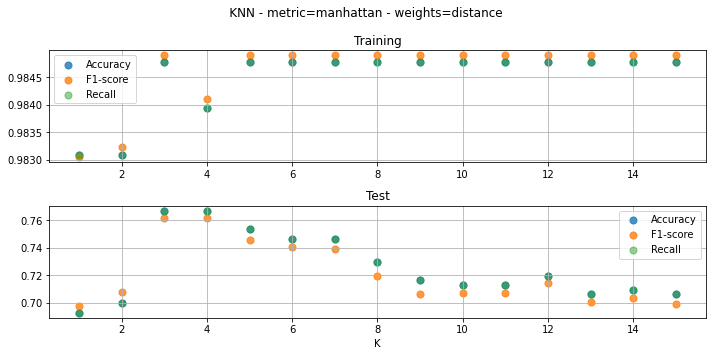

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=manhattan - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia chebyshev:

Pesos uniformes:    


In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='chebyshev')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   4   0   0   0   0   5]
 [  0 231   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  7   0   0   0 152   0   1]
 [  0   0   0   0   0 147   0]
 [  1   2   0   0   0   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       0.97      1.00      0.99       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       1.00      0.95      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[21  9  0  1  0  3  3]
 [ 0 48  0  2  3  0  1]
 [ 1  1 32  1  2  4  0]
 [ 1  1  0 32  2  0  0]
 [ 1  3  0  1 32  0  2]
 [ 1  0  0  2  0 45  3]
 [ 1  1  0  1  1  1 33]

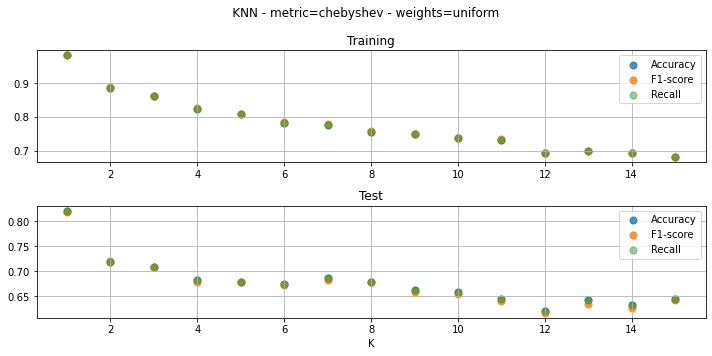

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=chebyshev - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='chebyshev',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[140   4   0   0   0   0   5]
 [  0 231   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  7   0   0   0 152   0   1]
 [  0   0   0   0   0 147   0]
 [  1   2   0   0   0   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       149
           1       0.97      1.00      0.99       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       1.00      0.95      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[21  9  0  1  0  3  3]
 [ 0 48  0  2  3  0  1]
 [ 1  1 32  1  2  4  0]
 [ 1  1  0 32  2  0  0]
 [ 1  3  0  1 32  0  2]
 [ 1  0  0  2  0 45  3]
 [ 1  1  0  1  1  1 33]

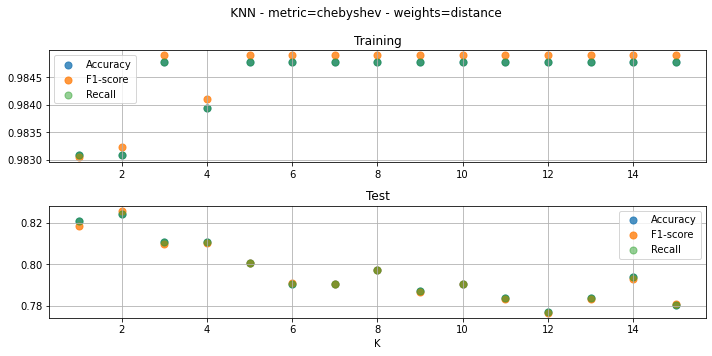

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=chebyshev - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()